In [1]:
#Instalamos las bibliotecas necesarias:
!pip install pandas openpyxl

In [3]:
import pandas as pd
#Cargamos el archivo de excel
df = pd.read_excel("C:/Users/piliv/OneDrive/Documentos/GitHub/-Big-Data-UNT--Grupo-1-/TP02/Base Limpia Airbnb NY.xlsx")
#El siguiente comando nos enseña las primeras filas de la base que cargamos
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park   2787.0   
1  2595                             Skylit Midtown Castle   2845.0   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !   4632.0   
3  3831                   Cozy Entire Floor of Brownstone   4869.0   
4  5022  Entire Apt: Spacious Studio/Loft by central park   7192.0   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0         John            Brooklyn    Kensington  4064749.0 -7397237.0   
1     Jennifer           Manhattan       Midtown  4075362.0 -7398377.0   
2    Elisabeth           Manhattan        Harlem  4080902.0  -739419.0   
3  LisaRoxanne            Brooklyn  Clinton Hill  4068514.0 -7395976.0   
4        Laura           Manhattan   East Harlem  4079851.0 -7394399.0   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0             1.0                9

In [5]:
num_duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 11


In [7]:
df_original = df.copy()
df.drop_duplicates(inplace=True)

In [9]:
# Queremos observar el número de datos faltantes por columna. Usamos los comandos:
missing_values = df.isnull().sum()
print(missing_values)

id                                  161
name                                 41
host_id                             285
host_name                           307
neighbourhood_group                 285
neighbourhood                       285
latitude                            285
longitude                           285
room_type                           285
price                               300
minimum_nights                      285
number_of_reviews                   285
last_review                       10323
reviews_per_month                 10323
calculated_host_listings_count      285
availability_365                    285
dtype: int64


In [11]:
# Eliminamos las 285 observaciones para las cuales tenemos datos faltantes en la variable host_id
df = df.dropna(subset=['host_id'])
missing_values = df.isnull().sum()
print(missing_values)

id                                  160
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10038
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [13]:
#Como las columnas id, host_id, host_name y name ya fueron usadas para eliminar duplicados, faltan de manera aleatoria
#y no se espera que tengan ninguna relevancia en el análisis y predicción de los datos, optamos por eliminarlas.
df = df.drop(columns=['id', 'name', 'host_id', 'host_name'])
missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10038
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [15]:
#En el caso de los datos faltantes para la variable price decidimos imputar por la media CONDICIONAL al tipo de habitación
#y al vecindario al que pertenece el airbnb cuyo precio no fue reportado. Para ello usamos el comando:
datos_faltantes = df.loc[df['price'].isnull(), ['room_type', 'neighbourhood']]
print(datos_faltantes)

             room_type       neighbourhood
4506   Entire home/apt     Lower East Side
12567     Private room          Greenpoint
12925     Private room         South Slope
25430     Private room          Kensington
26821     Private room             Belmont
27093  Entire home/apt  University Heights
28238  Entire home/apt             Midtown
35308     Private room         Sunset Park
35641     Private room            Flushing
35679     Private room             Tribeca
37140  Entire home/apt         South Slope
41176     Private room        Williamsburg
42039  Entire home/apt         Murray Hill
44047     Private room           Ridgewood
48890     Private room            Bushwick


In [17]:
#Calculamos los precios medios condicionales a la combinación de room_type y neighbouhood correspondiente a las 
#observaciones que tienen datos faltantes de la variable price
precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Lower East Side'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Greenpoint'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'South Slope'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Kensington'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Belmont'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'University Heights'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Midtown'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Sunset Park'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Flushing'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Tribeca'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'South Slope'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Williamsburg'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Murray Hill'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Ridgewood'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Bushwick'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

La media del precio es: 234.6158415841584
La media del precio es: 88.40631578947368
La media del precio es: 85.74725274725274
La media del precio es: 59.30927835051546
La media del precio es: 53.94444444444444
La media del precio es: 120.0
La media del precio es: 301.35122838944494
La media del precio es: 77.82843137254902
La media del precio es: 63.37581699346405
La media del precio es: 192.54545454545453
La media del precio es: 177.2139037433155
La media del precio es: 85.7565130260521
La media del precio es: 237.8391959798995
La media del precio es: 56.33922261484099
La media del precio es: 62.593804792518995


In [19]:
df.at[4506, 'price'] = 234.6
df.at[12567, 'price'] = 88.4
df.at[12925, 'price'] =85.7
df.at[25430, 'price'] = 59.3
df.at[26821, 'price'] = 53.9

df.at[27093, 'price'] = 120.0
df.at[28238, 'price'] = 301.4
df.at[35308, 'price'] = 77.8
df.at[35641, 'price'] = 63.4
df.at[35679, 'price'] = 192.5

df.at[37140, 'price'] = 177.2
df.at[41176, 'price'] = 85.8
df.at[42039, 'price'] = 237.8
df.at[44047, 'price'] = 56.3
df.at[48890, 'price'] = 62.6

missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10038
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [21]:
#Transformo la variable neighbourhood_group
mapeo_neighbourhood_group = {
    'Bronx': 1,
    'Brooklyn': 2,
    'Manhattan': 3,
    'Queens': 4,
    'Staten Island': 5
}
df['neighbourhood_group'] = df['neighbourhood_group'].map(mapeo_neighbourhood_group)
frecuencias = df['neighbourhood_group'].value_counts()
print(frecuencias)

neighbourhood_group
3    21635
2    20065
4     5627
1     1090
5      372
Name: count, dtype: int64


In [23]:
frecuencia = df['room_type'].value_counts()
print(frecuencia)

room_type
Entire home/apt    25366
Private room       22278
Shared room         1145
Name: count, dtype: int64


In [25]:
#Transformo la variable room_type
mapeo_room_type = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3
}
df['room_type'] = df['room_type'].map(mapeo_room_type)
frecuencias = df['room_type'].value_counts()
print(frecuencias)

room_type
1    25366
2    22278
3     1145
Name: count, dtype: int64


In [27]:
import pandas as pd
#Contamos la cantidad de oferentes por neighbourhood_group
offer_counts = df.groupby('neighbourhood_group').size().reset_index(name='offer_count')
#Ordenamos por la cantidad de oferentes y asignamos un ranking
offer_counts['offer group'] = offer_counts['offer_count'].rank(method='dense').astype(int)
df = df.merge(offer_counts[['neighbourhood_group', 'offer group']], on='neighbourhood_group', how='left')
print(df.head())

   neighbourhood_group neighbourhood   latitude  longitude  room_type  price  \
0                    2    Kensington  4064749.0 -7397237.0          2  149.0   
1                    3       Midtown  4075362.0 -7398377.0          1  225.0   
2                    3        Harlem  4080902.0  -739419.0          2  150.0   
3                    2  Clinton Hill  4068514.0 -7395976.0          1   89.0   
4                    3   East Harlem  4079851.0 -7394399.0          1   80.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             1.0                9.0  2018-10-19               0.21   
1             1.0               45.0  2019-05-21               0.38   
2             3.0                0.0         NaT                NaN   
3             1.0              270.0  2019-07-05               4.64   
4            10.0                9.0  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  offer group  
0                        

In [31]:
#Guardo los avances en un excel
df.to_excel('mi_df.xlsx', index=False)

In [32]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df1 = pd.read_excel("C:\\Users\\piliv\\OneDrive\\Documentos\\GitHub\\-Big-Data-UNT--Grupo-1-\\TP02\\mi_df_punto2.xlsx")
print(df1.head())

   neighbourhood_group   latitude  longitude  room_type  price  \
0                    2  4064749.0 -7397237.0          2  149.0   
1                    3  4075362.0 -7398377.0          1  225.0   
2                    3  4080902.0  -739419.0          2  150.0   
3                    2  4068514.0 -7395976.0          1   89.0   
4                    3  4079851.0 -7394399.0          1   80.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               

In [37]:
print(df1.dtypes)

neighbourhood_group                 int64
latitude                          float64
longitude                         float64
room_type                           int64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [39]:
# Convertir a tipo adecuado (float o int)
df1['neighbourhood_group'] = df1['neighbourhood_group'].astype(int)
df1['latitude'] = df1['latitude'].astype(float)
df1['longitude'] = df1['longitude'].astype(float)
df1['room_type'] = df1['room_type'].astype(int)
df1['price'] = df1['price'].astype(float)
df1['minimum_nights'] = df1['minimum_nights'].astype(int)
df1['number_of_reviews'] = df1['number_of_reviews'].astype(int)
df1['reviews_per_month'] = df1['reviews_per_month'].astype(float)
df1['calculated_host_listings_count'] = df1['calculated_host_listings_count'].astype(int)
df1['availability_365'] = df1['availability_365'].astype(int)

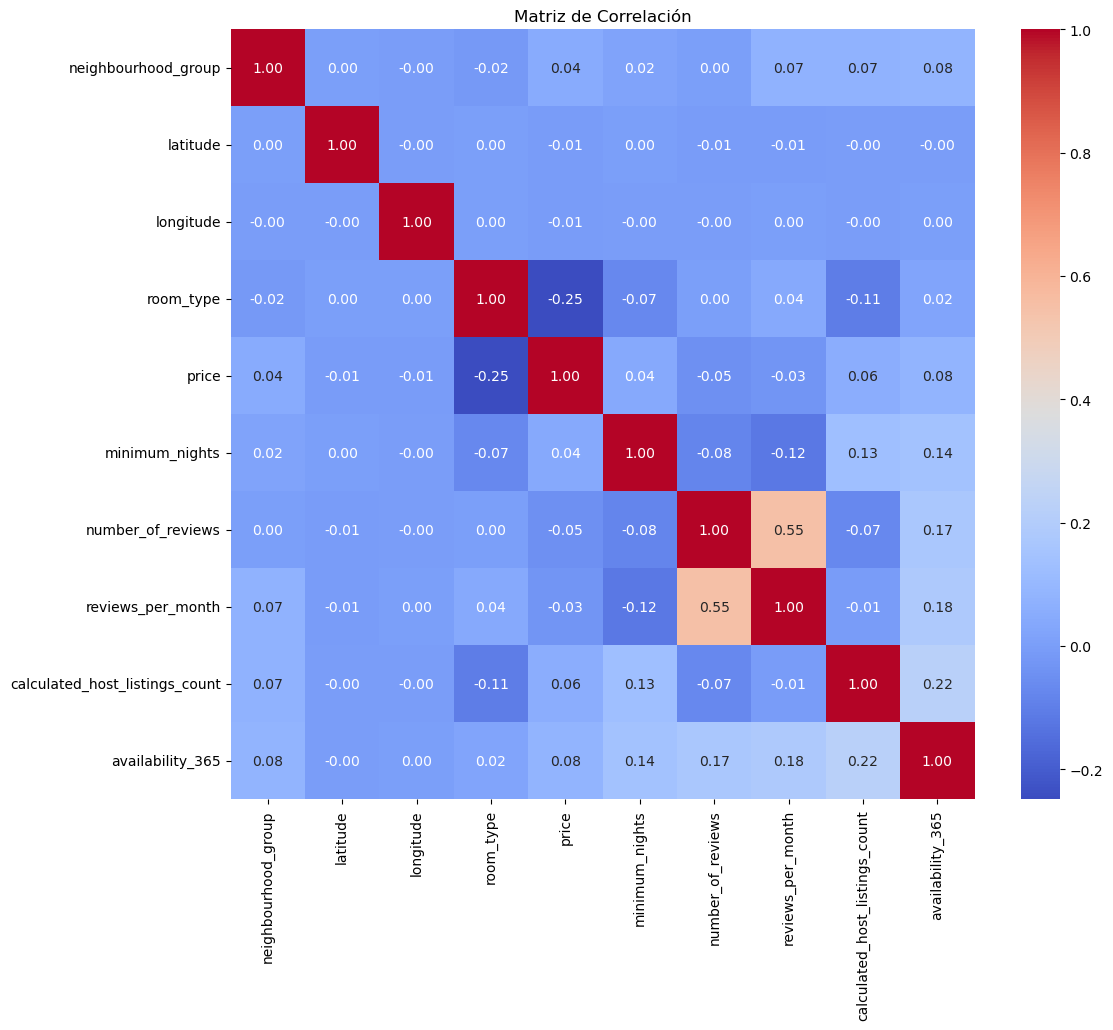

In [41]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [43]:
#Realizamos mapeos de vecindarios para que al hacer los gráficos aparezcan los nombres y no los números
neighbourhood_mapping = {
    1: 'Bronx',
    2: 'Brooklyn',
    3: 'Manhattan',
    4: 'Queens',
    5: 'Staten Island'
}
df1['neighbourhood_group'] = df1['neighbourhood_group'].replace(neighbourhood_mapping)

neighbourhood_group
Manhattan        44.344012
Brooklyn         41.126074
Queens           11.533337
Bronx             2.234110
Staten Island     0.762467
Name: proportion, dtype: float64


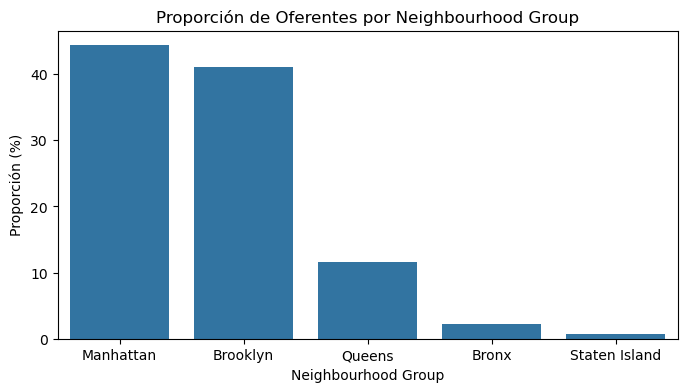

In [45]:
#Calculamos la proporción de oferentes por neighbourhood_group
neighbourhood_proportions = df1['neighbourhood_group'].value_counts(normalize=True) * 100
print(neighbourhood_proportions)
#Para graficar usamos los comandos
plt.figure(figsize=(8, 4))
sns.barplot(x=neighbourhood_proportions.index, y=neighbourhood_proportions.values)
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.show()

In [47]:
#Realizamos mapeos de tipos de habitación para que al hacer los gráficos aparezcan los nombres y no los números
room_type_mapping = {
    1: 'Entire home/apt',
    2: 'Private room',
    3: 'Shared room'
}
df1['room_type'] = df1['room_type'].replace(room_type_mapping)

room_type
Entire home/apt    51.991228
Private room       45.661932
Shared room         2.346840
Name: proportion, dtype: float64


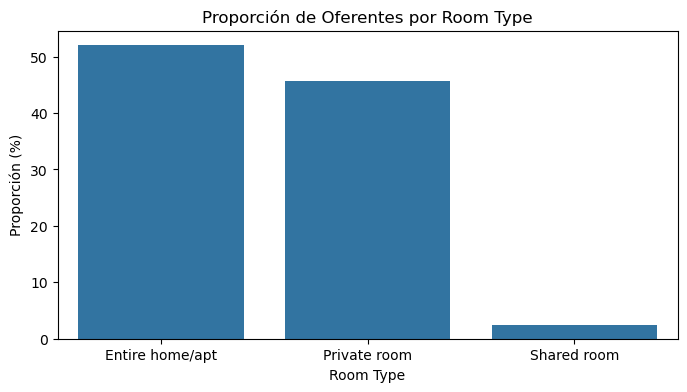

In [49]:
#Calculamos la proporción de oferentes por room_type
room_type_proportions = df1['room_type'].value_counts(normalize=True) * 100
print(room_type_proportions)
#Para graficar usamos los comandos:
plt.figure(figsize=(8, 4))
sns.barplot(x=room_type_proportions.index, y=room_type_proportions.values)
plt.title('Proporción de Oferentes por Room Type')
plt.xlabel('Room Type')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.show()